<a href="https://colab.research.google.com/github/cibelemoraes/Teste_Analytics_cibelemoraes/blob/main/Teste_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análise de dados do Quiosque da Praia - *2023*


IMPORTANDO BIBLIOTECAS


In [3]:
import sqlite3
import pandas as pd
import numpy as np


1.   Limpeza e Análise de Dados de Vendas

VOU CRIAR UMA DATA FRAME COM MINHAS COLUNAS PRE-DEFINIDAS

In [4]:
colunas = ["Data", "Produto", "Categoria", "Quantidade", "Preço"]
df = pd.DataFrame(columns=colunas)  #inserindo as colunas no meu dataframe

CRIANDO DADOS PARA O MEU DATAFRAME


In [40]:
DADOS = [
    ["02/01/2023", "COXINHA", "SALGADO", 3, 9],
    ["20/01/2023", "PASTEL", "SALGADO", 14, 12],
    ["29/01/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["30/01/2023", "SACOLE", "DOCE",5 , 20],
    ["02/01/2023", "CHOCOLATE QUENTE", "DIVERSOS", 2, 5],
    ["20/01/2023", "SORVETE", "DOCE", 9, 8],
    ["26/01/2023", "AGUA", "DIVERSOS", 20, 2],
    ["29/01/2023", "COCO", "DIVERSOS",25 , 3],
    ["30/01/2023", "SORVETE", "DOCE", 10, 8],
    ["01/02/2023", "COXINHA", "SALGADO", 13, 9],
    ["10/02/2023", "BRIGADEIRO", "DOCE", 10, 2],
    ["16/02/2023", "BIS", "DOCE", 15, 5],
    ["18/02/2023", "RISOLE", "SALGADO", 4, 10],
    ["28/02/2023", "ESFIRRA", "SALGADO", 9, 15],
    ["02/02/2023", "CHOCOLATE QUENTE", "DIVERSOS", 3, 5],
    ["20/02/2023", "SORVETE", "DOCE", 10, 8],
    ["26/02/2023", "AGUA", "DIVERSOS", 21, 2],
    ["27/02/2023", "COCO", "DIVERSOS", 26, 3],
    ["28/02/2023", "SORVETE", "DOCE", 11, 8],
    ["02/03/2023", "COXINHA", "SALGADO", 13, 9],
    ["20/03/2023", "PASTEL", "SALGADO", 4, 12],
    ["29/03/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["30/03/2023", "SACOLE", "DOCE", 5, 20],
    ["02/03/2023", "CHOCOLATE QUENTE", "DIVERSOS", 4, 5],
    ["20/03/2023", "SORVETE", "DOCE", 11, 8],
    ["26/03/2023", "AGUA", "DIVERSOS", 22, 2],
    ["29/03/2023", "COCO", "DIVERSOS",28 , 3],
    ["30/03/2023", "SORVETE", "DOCE", 13, 8],
    ["01/04/2023", "COXINHA", "SALGADO", 13, ],
    ["10/04/2023", "BRIGADEIRO", "DOCE", 10, 2],
    ["16/04/2023", "BIS", "DOCE", 15, 5],
    ["18/04/2023", "RISOLE", "SALGADO", 4, 10],
    ["25/04/2023", "ESFIRRA", "SALGADO", 15, 15],
    ["26/04/2023", "COXINHA", "SALGADO", 3, 9],
    ["27/04/2023", "PASTEL", "SALGADO", 14, 12],
    ["02/04/2023", "CHOCOLATE QUENTE", "DIVERSOS", 6, 5],
    ["20/04/2023", "SORVETE", "DOCE", 16, 8],
    ["26/04/2023", "AGUA", "DIVERSOS", 28, 2],
    ["29/04/2023", "COCO", "DIVERSOS",30 , 3],
    ["30/04/2023", "SORVETE", "DOCE", 18, 8],
    ["01/05/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["02/05/2023", "SACOLE", "DOCE", 5, 20],
    ["06/05/2023", "COXINHA", "SALGADO", 3, ],
    ["10/05/2023", "BRIGADEIRO", "DOCE", 10, 2],
    ["16/05/2023", "BIS", "DOCE", 11, 5],
    ["18/05/2023", "RISOLE", "SALGADO", 4, 10],
    ["25/05/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["02/05/2023", "CHOCOLATE QUENTE", "DIVERSOS", 5, 5],
    ["20/05/2023", "SORVETE", "DOCE", 15, 8],
    ["26/05/2023", "AGUA", "DIVERSOS", 25, 2],
    ["29/05/2023", "COCO", "DIVERSOS",28 , 3],
    ["30/05/2023", "SORVETE", "DOCE", 15, 8],
    ["02/06/2023", "COXINHA", "SALGADO", 3, 9],
    ["20/06/2023", "PASTEL", "SALGADO", 2, 12],
    ["29/06/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["30/06/2023", "SACOLE", "DOCE", 5, 20],
    ["02/06/2023", "CHOCOLATE QUENTE", "DIVERSOS", 10, 5],
    ["20/06/2023", "SORVETE", "DOCE", 2, 8],
    ["26/06/2023", "AGUA", "DIVERSOS", 10, 2],
    ["29/06/2023", "COCO", "DIVERSOS",8 , 3],
    ["30/06/2023", "SORVETE", "DOCE", 3, 8],
    ["01/07/2023", "COXINHA", "SALGADO", 3, 9],
    ["10/07/2023", "BRIGADEIRO", "DOCE", 10, 2],
    ["16/07/2023", "BIS", "DOCE", 15, 5],
    ["18/05/2023", "RISOLE", "SALGADO", 4, 10],
    ["25/07/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["02/07/2023", "CHOCOLATE QUENTE", "DIVERSOS", 8, 5],
    ["20/07/2023", "SORVETE", "DOCE", 1, 8],
    ["26/07/2023", "AGUA", "DIVERSOS", 9, 2],
    ["29/07/2023", "COCO", "DIVERSOS", 7, 3],
    ["30/07/2023", "SORVETE", "DOCE", 2, 8],
    ["02/08/2023", "COXINHA", "SALGADO", 3, 9],
    ["20/08/2023", "PASTEL", "SALGADO", 4, 12],
    ["29/08/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["30/08/2023", "SACOLE", "DOCE", 10, 20],
    ["02/08/2023", "CHOCOLATE QUENTE", "DIVERSOS", 12, 5],
    ["20/08/2023", "SORVETE", "DOCE", 6, 8],
    ["26/08/2023", "AGUA", "DIVERSOS", 12, 2],
    ["29/08/2023", "COCO", "DIVERSOS", 16, 3],
    ["30/08/2023", "SORVETE", "DOCE", 9, 8],
    ["01/09/2023", "COXINHA", "SALGADO", 3, 9],
    ["10/09/2023", "BRIGADEIRO", "DOCE", 10, 2],
    ["16/09/2023", "BIS", "DOCE", 15, 5],
    ["18/09/2023", "RISOLE", "SALGADO", 4, 10],
    ["25/09/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["02/09/2023", "CHOCOLATE QUENTE", "DIVERSOS", 10, 5],
    ["20/09/2023", "SORVETE", "DOCE", 5, 8],
    ["26/09/2023", "AGUA", "DIVERSOS", 10, 2],
    ["29/09/2023", "COCO", "DIVERSOS", 13, 3],
    ["30/09/2023", "SORVETE", "DOCE", 8, 8],
    ["02/10/2023", "COXINHA", "SALGADO", 3, 9],
    ["20/10/2023", "PASTEL", "SALGADO", 4, 12],
    ["29/10/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["30/10/2023", "SACOLE", "DOCE", 5, 20],
    ["02/10/2023", "CHOCOLATE QUENTE", "DIVERSOS", 12, 5],
    ["20/10/2023", "SORVETE", "DOCE", 16, 8],
    ["26/10/2023", "AGUA", "DIVERSOS", 12, 2],
    ["29/10/2023", "COCO", "DIVERSOS", 14, 3],
    ["30/10/2023", "SORVETE", "DOCE", 10, 8],
    ["01/11/2023", "COXINHA", "SALGADO", 3, 9],
    ["10/11/2023", "BRIGADEIRO", "DOCE", 10, 2],
    ["16/11/2023", "BIS", "DOCE", 18, 5],
    ["18/11/2023", "RISOLE", "SALGADO", 4, 10],
    ["25/11/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["02/11/2023", "CHOCOLATE QUENTE", "DIVERSOS", 12, 5],
    ["20/11/2023", "SORVETE", "DOCE", 16, 8],
    ["26/11/2023", "AGUA", "DIVERSOS", 12, 2],
    ["29/11/2023", "COCO", "DIVERSOS", 14, 3],
    ["30/11/2023", "SORVETE", "DOCE", 10, 8],
    ["02/12/2023", "COXINHA", "SALGADO", 3, 9],
    ["10/12/2023", "PASTEL", "SALGADO", 9, 12],
    ["12/12/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["30/12/2023", "SACOLE", "DOCE", 5, 20],
    ["16/12/2023", "COXINHA", "SALGADO", 3, 9],
    ["18/12/2023", "BRIGADEIRO", "DOCE", 5 , 2],
    ["22/12/2023", "BIS", "DOCE", 15, 5],
    ["24/12/2023", "RISOLE", "SALGADO", 4, 10],
    ["25/12/2023", "ESFIRRA", "SALGADO", 5, 15],
    ["02/12/2023", "CHOCOLATE QUENTE", "DIVERSOS", 10, 5],
    ["20/12/2023", "SORVETE", "DOCE", 19, 8],
    ["26/12/2023", "AGUA", "DIVERSOS", 22, 2],
    ["29/12/2023", "COCO", "DIVERSOS", 24, 3],
    ["30/12/2023", "SORVETE", "DOCE", 30, 8],

]

In [41]:
df = pd.DataFrame(DADOS, columns=colunas) #adicionando os meus dados ao meu dataframe


In [42]:
df.head(30) #vizualizando o meu data frame

,Data,Produto,Categoria,Quantidade,Preço
0,02/01/2023,COXINHA,SALGADO,3,9.0
1,20/01/2023,PASTEL,SALGADO,14,12.0
2,29/01/2023,ESFIRRA,SALGADO,5,15.0
3,30/01/2023,SACOLE,DOCE,5,20.0
4,02/01/2023,CHOCOLATE QUENTE,DIVERSOS,2,5.0
5,20/01/2023,SORVETE,DOCE,9,8.0
6,26/01/2023,AGUA,DIVERSOS,20,2.0
7,29/01/2023,COCO,DIVERSOS,25,3.0
8,30/01/2023,SORVETE,DOCE,10,8.0
9,01/02/2023,COXINHA,SALGADO,13,9.0


In [43]:
df = df.drop_duplicates() #excluindo linhas dados duplicados

In [44]:
df = df.dropna() #excluindo linhas com valores faltantes nan ou none

In [45]:
df["Quantidade"] = df["Quantidade"].astype(int) #transformando a coluna quantidade em inteiro

In [46]:
df["Preço"] = df["Preço"].astype(float) #transformando a coluna preço em float

In [47]:
df["Data"] = pd.to_datetime(df["Data"], format='%d/%m/%Y', errors='coerce') #convertendo a minha coluna data para datetime

Salvando meu dados modificados em csv

In [51]:
df.to_csv("data_clean.csv.csv", index=False)

Calculando o total de vendas Por produto

In [52]:
df["TOTAL_VENDAS"] = df["Quantidade"] * df["Preço"]

In [65]:
df.head(10) #vizualizando o meu data frame

,Data,Produto,Categoria,Quantidade,Preço,TOTAL_VENDAS
0,2023-01-02,COXINHA,SALGADO,3,9.0,27.0
1,2023-01-20,PASTEL,SALGADO,14,12.0,168.0
2,2023-01-29,ESFIRRA,SALGADO,5,15.0,75.0
3,2023-01-30,SACOLE,DOCE,5,20.0,100.0
4,2023-01-02,CHOCOLATE QUENTE,DIVERSOS,2,5.0,10.0
5,2023-01-20,SORVETE,DOCE,9,8.0,72.0
6,2023-01-26,AGUA,DIVERSOS,20,2.0,40.0
7,2023-01-29,COCO,DIVERSOS,25,3.0,75.0
8,2023-01-30,SORVETE,DOCE,10,8.0,80.0
9,2023-02-01,COXINHA,SALGADO,13,9.0,117.0


Vou agrupar meus produtos e somar as vendas

In [54]:
Vendas_by_produto = df.groupby("Produto")["TOTAL_VENDAS"].sum()

In [55]:
produto_most_sell = Vendas_by_produto.idxmax()  #produto mais vendido vai aparecer aqui

In [56]:
valor_mais_vendido = Vendas_by_produto.max() #valor do produto mais vendido vai aparecer aqui

In [79]:
print("produto que mais vendeu 2023")
print(produto_most_sell)
print("valor total do produto que mais vendeu no ano")
print(valor_mais_vendido)

produto que mais vendeu 2023
SORVETE
valor total do produto que mais vendeu no ano
2120.0


2.   Análise Exploratória de Dados de Vendas

In [58]:
import matplotlib.pyplot as plt

In [59]:
df_mensal =df.resample("ME",on="Data").sum() #somando as vendas por mês

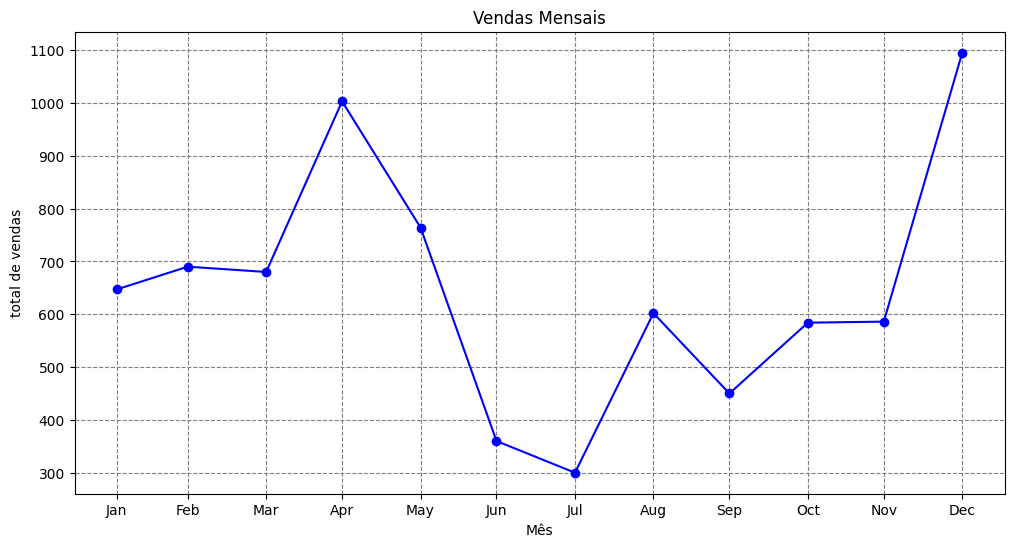

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_mensal.index, df_mensal["TOTAL_VENDAS"], 'o-b', label="Vendas Mensais") #função plt para plotar os dados de total vendas num grafico de linha 
plt.title("Agrupamento de Vendas Mensais (2023)")
plt.xlabel("Mês") #meu titulo eixo x
plt.ylabel("total de vendas") #meu titulo eixo y
plt.title("Vendas Mensais") #meu titulo do grafico
plt.grid(True,linestyle="--",color="gray")
plt.xticks(ticks=df_mensal.index, labels=df_mensal.index.strftime('%b'))
plt.show()


Meses de maior vendas foram Abril e Dezembro por causa provavel do verão

Meses de menos vendas junho e julho
 por causa provavel do inverno

Vamos observar a Categoria com maior numero de vendas


In [67]:
sell_by_category = df.groupby("Categoria")["TOTAL_VENDAS"].sum().sort_values(ascending=False) #agrupando meu numero total de vendas por categoria

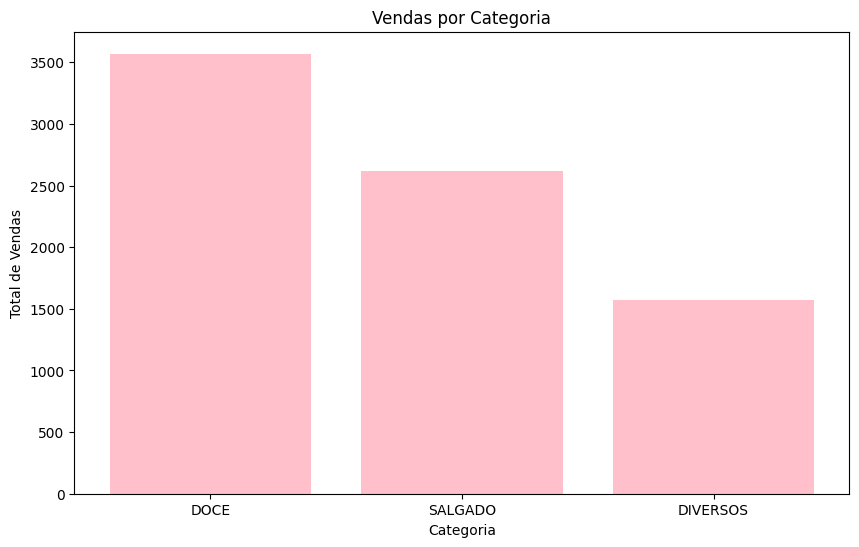

In [ ]:
#criando grafico de Barras para representar vendas por categoria
plt.figure(figsize=(10,6)) #tamanho do meu grafico 
plt.bar(sell_by_category.index,sell_by_category.values, color="pink")#configuração de cor das barras
plt.title("Vendas por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Total de Vendas")
plt.show() #plt para exibir 

Podemos observar que os produtos que mais venderam durante o ano foram os doces


Vou criar outro gráfico para saber quais produtos mais venderam na categoria Doces

In [70]:
doces = df[df["Categoria"] == "DOCE"] #filtrando somente os produtos doces em minha categoria

In [72]:
sell_by_doces = doces.groupby("Produto")["TOTAL_VENDAS"].sum().sort_values(ascending=False) #agrupando todas as minhas vendas de doces


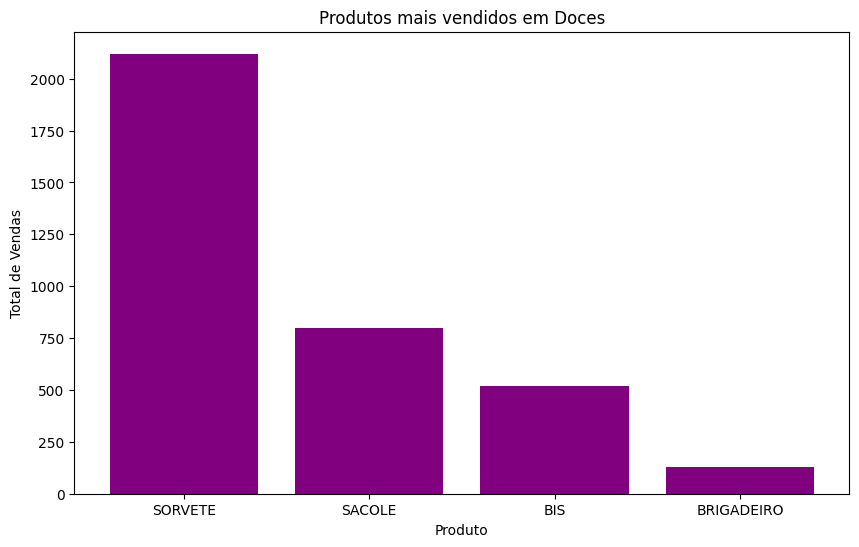

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(sell_by_doces.index,sell_by_doces.values, color="purple") #configuração de cor para o grafico de barrar representar o sel_y_doces
plt.title("Produtos mais vendidos em Doces")
plt.xlabel("Produto")
plt.ylabel("Total de Vendas")
plt.show()

Podemos obervar que o soverte foi o que mais vendeu seguido do sacole
